<a href="https://colab.research.google.com/github/GiX7000/10-machine-learning-algorithms-from-scratch/blob/main/09_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementation of a Principal Component Analysis algorithm

PCA is an unsupervised method that is often used to reduce dimensionality of a dataset, keeping most of the informtion. For a brief introduction of PCA see [here](https://www.youtube.com/watch?v=FD4DeN81ODY), and for deeper understanding, see this [lecture](https://www.youtube.com/watch?v=I_c6w1SJSJs).

In [1]:
# imports
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

## 1. Download the [iris dataset](https://gist.github.com/curran/a08a1080b88344b0c8a7).

In [2]:
# create X, y
data = datasets.load_iris()
X = data.data
y = data.target

# let's see some things about the data
print(X.shape, y.shape)
print(X[3], y[3])
print(np.unique(y))

(150, 4) (150,)
[4.6 3.1 1.5 0.2] 0
[0 1 2]


So, we have 4 features and if we wanted to plot all the data we would need a 4-dimensional space. That's very hard for us to do and understand it. It would be more useful, if we could visualize it in a 2-dimensional space. This is where PCA comes to trasform the dataset from 4 to 3, from 3 to 2 dimensions by keeping all the useful information. Let's try it.

## 2. Create a custom PCA [model](https://www.youtube.com/watch?v=Rjr62b_h7S4&t=22s).

In [3]:
class PCA:

    def __init__(self, n_components):
        self.n_components = n_components # is the number of dimensions we want after the transformation
        self.components = None
        self.mean = None

    def fit(self, X):
        # mean centering
        self.mean = np.mean(X, axis=0)
        X = X -  self.mean

        # covariance, functions needs samples as columns
        cov = np.cov(X.T)

        # eigenvectors, eigenvalues
        eigenvectors, eigenvalues = np.linalg.eig(cov)

        # eigenvectors v = [:, i] column vector, transpose this for easier calculations
        eigenvectors = eigenvectors.T

        # sort eigenvectors
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]

        self.components = eigenvectors[:self.n_components]

    def transform(self, X):
        # projects data
        X = X - self.mean
        return np.dot(X, self.components.T)


## 3. Use the PCA model.

In [4]:
# create an instance of PCA by keeping 2 dimensions
custom_pca = PCA(2)

# fit the data to the model
custom_pca.fit(X)

In [5]:
# find projections - transform X with PCA
X_projected = custom_pca.transform(X)

# see how X and X-projected look like
print("Initial shape of X:", X.shape)
print("Transformed shape of X:", X_projected.shape)

Initial shape of X: (150, 4)
Transformed shape of X: (150, 2)


So, we reeduced the dimensions of the dataset from 4 to 2. Let's visualize it now.

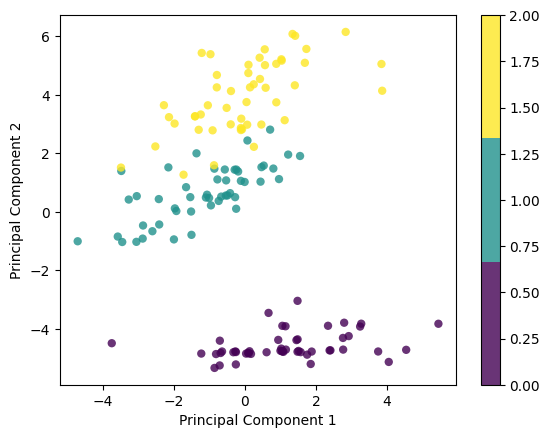

In [6]:
# plot the projections
import matplotlib.colors as mcolors

viridis_colors = plt.cm.viridis([0, 0.5, 1])
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=y, edgecolor="none", alpha=0.8, cmap=mcolors.ListedColormap(viridis_colors))

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar()
plt.show()

## 4. Compare with the PCA from scikit-learn library.

Let's see now, what results a [PCA](https://scikit-learn.org/dev/modules/generated/sklearn.decomposition.PCA.html) from scikit-learn library gives us.

In [7]:
# let's compare now with the accuracy that sklearn gives us
from sklearn.decomposition import PCA

pca_sklearn = PCA(n_components=2)
pca_sklearn.fit(X)
X_projected_sklearn = pca_sklearn.transform(X)

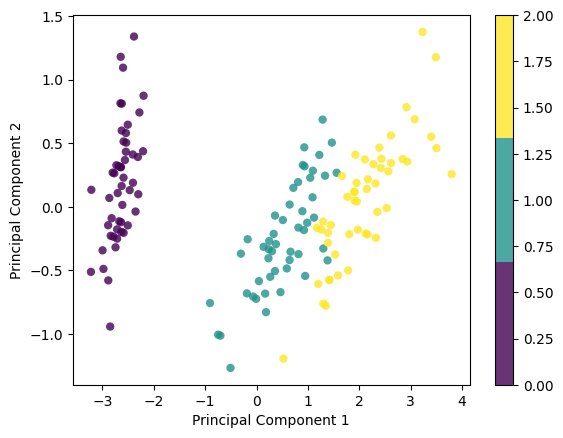

In [8]:
# plot the projections
plt.scatter(X_projected_sklearn[:, 0], X_projected_sklearn[:, 1], c=y, edgecolor="none", alpha=0.8, cmap=mcolors.ListedColormap(viridis_colors))

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar()
plt.show()

We got similar transformations from the above PCAs. Try it to bigger real data.